# **1. Regresión Logística sin Regularización**

In [460]:
import pandas as pd #pd solo es el alias
import os #operating system
print("Current Working Directory " , os.getcwd())
data = pd.read_csv('ex2data1.txt')
data.head() #muestra los primeros 5 ejemplos


Current Working Directory  /Users/juancisneros/Documents/USFQ/Sexto_Semestre/Machine_Learning/Regre_Logistica


,exam1_score,exam2_score,decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Extraemos las columnas de características y guardamos en la variable `X`

In [461]:
X = data[['exam1_score','exam2_score']]
X.head() #muestra los primeros 5 ejemplos

,exam1_score,exam2_score
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [462]:
y = data[['decision']]
y.head()
#type(y.shape)
#y.values.ravel()
#type(y.shape)

,decision
0,0
1,0
2,0
3,1
4,1


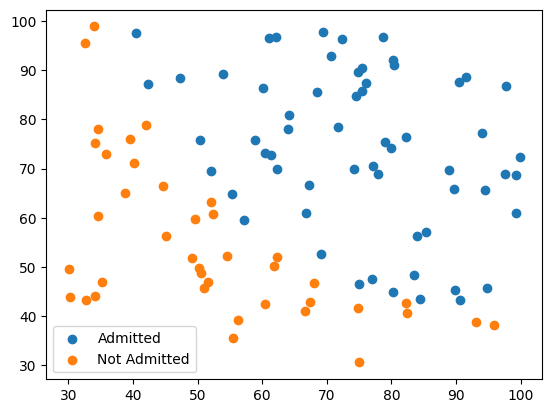

In [463]:
import matplotlib.pyplot as plt

# Visualizamos los datos de entrenamiento, donde los ejemplos positivos (admitidos) están marcados con un 1 
# y los negativos (no admitidos) con un 0.

X_admitted = X[y['decision']==1] 
plt.scatter(X_admitted['exam1_score'], X_admitted['exam2_score'], label='Admitted')

X_Not_admitted = X[y['decision']==0] 
plt.scatter(X_Not_admitted['exam1_score'], X_Not_admitted['exam2_score'], label='Not Admitted')
plt.legend()

In [464]:
from sklearn.linear_model import LogisticRegression
import numpy as np # numpy~Matlab
classifier = LogisticRegression(penalty='none').fit(X, y) #penalty='none' -> sin regularización , lambda =0, representación+eval+opt (Representación, evaluación y optimización en una sola función)
xnew = np.array([[45, 85], [50, 99]]) # vamos a predecir la probabilidad de que un estudiante con 45 en el examen 1 y 85 en el examen 2 sea admitido y otro con 50 en el examen 1 y 99 en el examen 2
proba = classifier.predict_proba(xnew) # predict_proba -> devuelve la probabilidad de que un ejemplo pertenezca a una clase u otra
print(proba)

[[0.22370987 0.77629013]
 [0.00608428 0.99391572]]


/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [465]:
accuracy = classifier.score(X,y) #exactitud en el conjunto de entrenamiento
print(accuracy)

0.89


/usr/local/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Parámetros theta sin theta_0(bias):
[[0.20623222 0.20147191]]
bias (theta_0):
[-25.16138567]


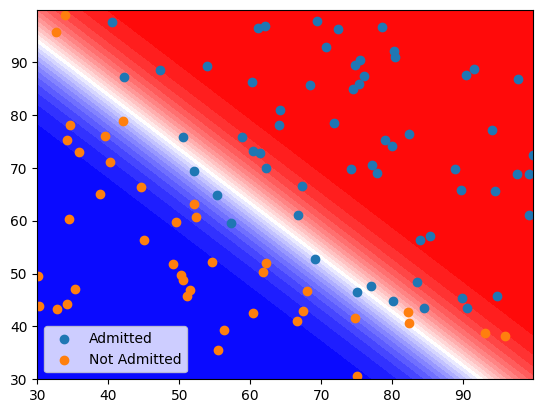

In [466]:
theta = classifier.coef_ #theta_1, theta_2, etc..
bias = classifier.intercept_ #bias-> theta_0
print('Parámetros theta sin theta_0(bias):')
print(theta) #parámetros theta (sin el bias)
print('bias (theta_0):')
print(bias)

import matplotlib.pyplot as plt

xx, yy = np.mgrid[30:100:.1, 30:100:.1] # mgrid -> crea una malla de puntos, en este caso de 30 a 100 con un paso de 0.1
grid = np.c_[xx.ravel(), yy.ravel()] # ravel -> devuelve una matriz aplanada, c_ -> concatena matrices
probs = classifier.predict_proba(grid)[:, 1].reshape(xx.shape)# predict_proba -> devuelve la probabilidad de que un ejemplo pertenezca a una clase u otra, [:, 1] -> devuelve la probabilidad de que un ejemplo pertenezca a la clase 1, reshape -> devuelve una matriz con la forma especificada
plt.contourf(xx, yy, probs, 25, cmap="bwr",
                      vmin=0, vmax=1)
X_admitted = X[y['decision']==1] 
plt.scatter(X_admitted['exam1_score'], X_admitted['exam2_score'], label='Admitted')
X_Not_admitted = X[y['decision']==0] 
plt.scatter(X_Not_admitted['exam1_score'], X_Not_admitted['exam2_score'], label='Not Admitted')
plt.legend()

# **2. Regresión Logística Regularizada**


In [467]:
import pandas as pd
import os
print("Current Working Directory " , os. getcwd())
data = pd.read_csv('ex2data2.txt')
print(data.shape)
data.head() #muestra los primeros 5 ejemplos


Current Working Directory  /Users/juancisneros/Documents/USFQ/Sexto_Semestre/Machine_Learning/Regre_Logistica
(118, 3)


,test1,test2,QA
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [468]:
X = data[['test1','test2']]
print(X.shape)
X.head()

(118, 2)


,test1,test2
0,0.051267,0.69956
1,-0.092742,0.68494
2,-0.213710,0.69225
3,-0.375000,0.50219
4,-0.513250,0.46564


In [469]:
y = data[['QA']]
y.head()

,QA
0,1
1,1
2,1
3,1
4,1


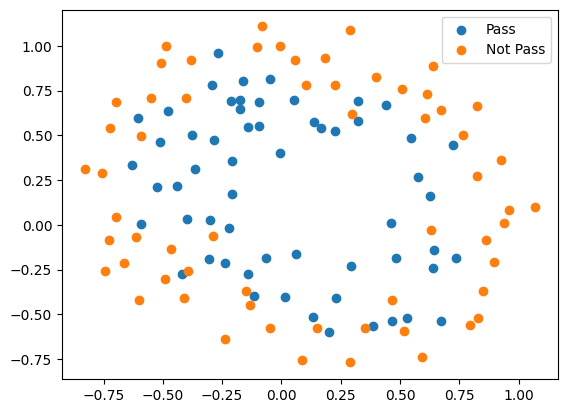

In [470]:
import matplotlib.pyplot as plt

X_admitted = X[y['QA']==1] 
plt.scatter(X_admitted['test1'], X_admitted['test2'], label='Pass')

X_Not_admitted = X[y['QA']==0] 
plt.scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], label='Not Pass')
plt.legend()

In [471]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=15) # x1*x2, x1*x2^2, ....x1^14*x2, degree es un hyperparameter (no tengo idea pero lanzo un grado alto)(overfitting)
X_pol = poly.fit_transform(X)
print(np.shape(X_pol)) # 118 ejemplos, 136 features (todas las combinaciones de los 2 features de grado 15)


(118, 136)


In [472]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lambda_value = 10000 #hyperparameter 
classifier = LogisticRegression(penalty='l2', C=1/lambda_value, max_iter=10000).fit(X_pol, y) #spenalty='l2' -> con regularización 
xnew = np.array([[-0.75, -0.75], [0.25, 0.25]])
classifier.predict_proba(poly.transform(xnew))


/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[0.50830835, 0.49169165],
       [0.50821824, 0.49178176]])

In [473]:
from sklearn.metrics import accuracy_score



accuracy = classifier.score(X_pol,y) #umbral de 0.5 50%
print(accuracy) #exactitud en el conjunto de entrenamiento, umbral de 0.5 50%

proba = classifier.predict_proba(poly.transform(X))
ypred = proba[:,1]>0.5 #umbral 
print(accuracy_score(y,ypred)) #exactitud en el conjunto de entrenamiento, umbral de 0.5 50%



0.5084745762711864
0.5084745762711864


/usr/local/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


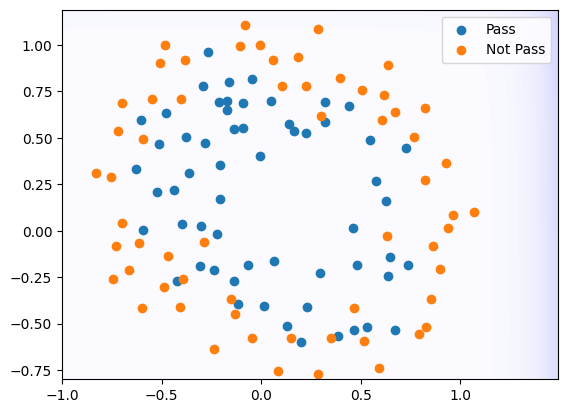

In [474]:
import matplotlib.pyplot as plt

xx, yy = np.mgrid[-1:1.5:.01, -0.8:1.2:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = classifier.predict_proba(poly.transform(grid))[:, 1].reshape(xx.shape)
plt.contourf(xx, yy, probs, 25, cmap="bwr",
                      vmin=0, vmax=1)
X_admitted = X[y['QA']==1] 
plt.scatter(X_admitted['test1'], X_admitted['test2'], label='Pass')
X_Not_admitted = X[y['QA']==0] 
plt.scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], label='Not Pass')
plt.legend()



## **Actividad 1**

En esta parte del ejercicio, podrá probar diferentes parámetros de regularización para el conjunto de datos para comprender cómo la regularización evita el sobreajuste.

Observe los cambios en la frontera de decisión a medida que varía λ. Analice
al menos los siguientes valores del parámetro de regularización, i.e., λ = 0.001, 
λ =1, λ = 10, λ = 100 y discuta sus resultados en términos de la frontera de decisión obtenida y la exactitud en el conjunto de entrenamiento.
Obtenga y discuta los resultados del análisis pedido.

### λ = 0.001

Predictions for xnew:  [[1.00000000e+00 1.66429739e-13]
 [2.34786109e-02 9.76521389e-01]]

exactitud en el conjunto de entrenamiento, umbral de 0.5 50%
0.8813559322033898
0.8813559322033898


/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


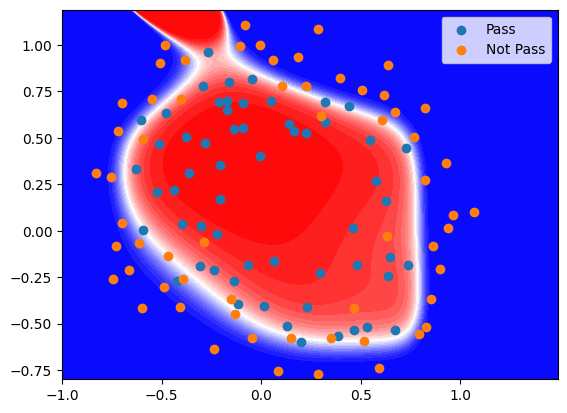

In [475]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lambda_value = 0.001 #hyperparameter 
classifier = LogisticRegression(penalty='l2', C=1/lambda_value, max_iter=10000).fit(X_pol, y) #spenalty='l2' -> con regularización 
xnew = np.array([[-0.75, -0.75], [0.25, 0.25]])
print('Predictions for xnew: ',classifier.predict_proba(poly.transform(xnew)))
from sklearn.metrics import accuracy_score
accuracy = classifier.score(X_pol,y) #umbral de 0.5 50%
print()
print('exactitud en el conjunto de entrenamiento, umbral de 0.5 50%')
print(accuracy) #exactitud en el conjunto de entrenamiento, umbral de 0.5 50%
proba = classifier.predict_proba(poly.transform(X))
ypred = proba[:,1]>0.5 #umbral 
print(accuracy_score(y,ypred)) #exactitud en el conjunto de entrenamiento, umbral de 0.5 50%=
import matplotlib.pyplot as plt
xx, yy = np.mgrid[-1:1.5:.01, -0.8:1.2:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = classifier.predict_proba(poly.transform(grid))[:, 1].reshape(xx.shape)
plt.contourf(xx, yy, probs, 25, cmap="bwr",
                      vmin=0, vmax=1)
X_admitted = X[y['QA']==1] 
plt.scatter(X_admitted['test1'], X_admitted['test2'], label='Pass')
X_Not_admitted = X[y['QA']==0] 
plt.scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], label='Not Pass')
plt.legend()

### λ =1

Predictions for xnew:  [[0.96761381 0.03238619]
 [0.19633991 0.80366009]]

exactitud en el conjunto de entrenamiento, umbral de 0.5 50%
0.8305084745762712
0.8305084745762712


/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


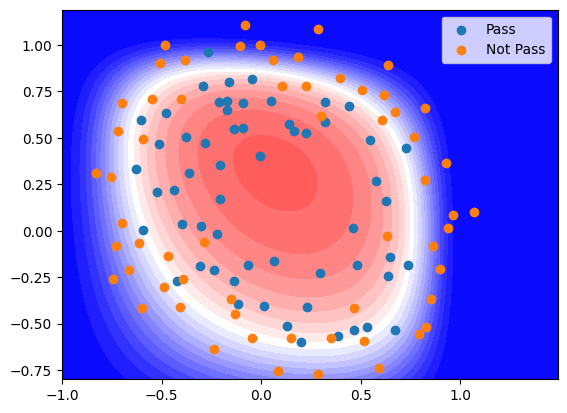

In [476]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lambda_value = 1 #hyperparameter 
classifier = LogisticRegression(penalty='l2', C=1/lambda_value, max_iter=10000).fit(X_pol, y) #spenalty='l2' -> con regularización 
xnew = np.array([[-0.75, -0.75], [0.25, 0.25]])
print('Predictions for xnew: ',classifier.predict_proba(poly.transform(xnew)))
from sklearn.metrics import accuracy_score
accuracy = classifier.score(X_pol,y) #umbral de 0.5 50%
print()
print('exactitud en el conjunto de entrenamiento, umbral de 0.5 50%')
print(accuracy) #exactitud en el conjunto de entrenamiento, umbral de 0.5 50%
proba = classifier.predict_proba(poly.transform(X))
ypred = proba[:,1]>0.5 #umbral 
print(accuracy_score(y,ypred)) #exactitud en el conjunto de entrenamiento, umbral de 0.5 50%=
import matplotlib.pyplot as plt
xx, yy = np.mgrid[-1:1.5:.01, -0.8:1.2:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = classifier.predict_proba(poly.transform(grid))[:, 1].reshape(xx.shape)
plt.contourf(xx, yy, probs, 25, cmap="bwr",
                      vmin=0, vmax=1)
X_admitted = X[y['QA']==1] 
plt.scatter(X_admitted['test1'], X_admitted['test2'], label='Pass')
X_Not_admitted = X[y['QA']==0] 
plt.scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], label='Not Pass')
plt.legend()

### λ = 10,

Predictions for xnew:  [[0.59354614 0.40645386]
 [0.41285208 0.58714792]]

exactitud en el conjunto de entrenamiento, umbral de 0.5 50%
0.7203389830508474
0.7203389830508474


/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


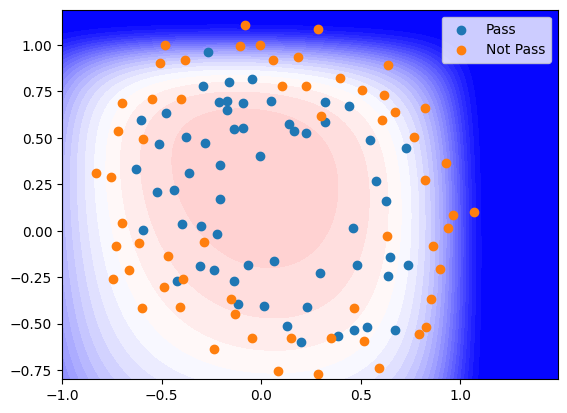

In [477]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lambda_value = 10 #hyperparameter 
classifier = LogisticRegression(penalty='l2', C=1/lambda_value, max_iter=10000).fit(X_pol, y) #spenalty='l2' -> con regularización 
xnew = np.array([[-0.75, -0.75], [0.25, 0.25]])
print('Predictions for xnew: ',classifier.predict_proba(poly.transform(xnew)))
from sklearn.metrics import accuracy_score
accuracy = classifier.score(X_pol,y) #umbral de 0.5 50%
print()
print('exactitud en el conjunto de entrenamiento, umbral de 0.5 50%')
print(accuracy) #exactitud en el conjunto de entrenamiento, umbral de 0.5 50%
proba = classifier.predict_proba(poly.transform(X))
ypred = proba[:,1]>0.5 #umbral 
print(accuracy_score(y,ypred)) #exactitud en el conjunto de entrenamiento, umbral de 0.5 50%=
import matplotlib.pyplot as plt
xx, yy = np.mgrid[-1:1.5:.01, -0.8:1.2:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = classifier.predict_proba(poly.transform(grid))[:, 1].reshape(xx.shape)
plt.contourf(xx, yy, probs, 25, cmap="bwr",
                      vmin=0, vmax=1)
X_admitted = X[y['QA']==1] 
plt.scatter(X_admitted['test1'], X_admitted['test2'], label='Pass')
X_Not_admitted = X[y['QA']==0] 
plt.scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], label='Not Pass')
plt.legend()

 ### λ = 100

Predictions for xnew:  [[0.50174447 0.49825553]
 [0.48914814 0.51085186]]

exactitud en el conjunto de entrenamiento, umbral de 0.5 50%
0.6610169491525424
0.6610169491525424


/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


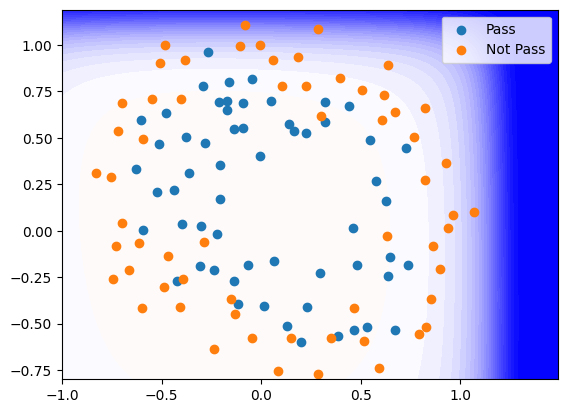

In [478]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lambda_value = 100 #hyperparameter 
classifier = LogisticRegression(penalty='l2', C=1/lambda_value, max_iter=10000).fit(X_pol, y) #spenalty='l2' -> con regularización 
xnew = np.array([[-0.75, -0.75], [0.25, 0.25]])
print('Predictions for xnew: ',classifier.predict_proba(poly.transform(xnew)))
from sklearn.metrics import accuracy_score
accuracy = classifier.score(X_pol,y) #umbral de 0.5 50%
print()
print('exactitud en el conjunto de entrenamiento, umbral de 0.5 50%')
print(accuracy) #exactitud en el conjunto de entrenamiento, umbral de 0.5 50%
proba = classifier.predict_proba(poly.transform(X))
ypred = proba[:,1]>0.5 #umbral 
print(accuracy_score(y,ypred)) #exactitud en el conjunto de entrenamiento, umbral de 0.5 50%=
import matplotlib.pyplot as plt
xx, yy = np.mgrid[-1:1.5:.01, -0.8:1.2:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = classifier.predict_proba(poly.transform(grid))[:, 1].reshape(xx.shape)
plt.contourf(xx, yy, probs, 25, cmap="bwr",
                      vmin=0, vmax=1)
X_admitted = X[y['QA']==1] 
plt.scatter(X_admitted['test1'], X_admitted['test2'], label='Pass')
X_Not_admitted = X[y['QA']==0] 
plt.scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], label='Not Pass')
plt.legend()

### Discuta sus resultados en términos de la frontera de decisión obtenida y la exactitud en el conjunto de entrenamiento. Obtenga y discuta los resultados del análisis pedido.

En términos de la frontera de decisión obtenida y la exactitud en el conjunto de entrenamiento se puede decir que un lambda muy pequeño hace que el modelo se sobreajuste, mientras que un lambda muy grande hace que el modelo se subajuste. En este caso, un lambda de 1 es el que mejor se ajusta a los datos. Y es el lambda que para este caso, da la mejor frontera de decisión y la mejor exactitud en el conjunto de entrenamiento.

# **3. "Churn" en operadoras telefónicas**.


Para esta parte del laboratorio, Vamos a usar el dataset disponible en [link text](https://www.kaggle.com/mnassrib/telecom-churn-datasets)

Este dataset está compuesto de datos de la actividad de clientes de una operadora de telefonía. La columna `Churn` es la etiqueta o salida que se desea predecir. Cuando "Churn" es 1 significa que el cliente cambió de operadora. El objetivo es predecir si un cliente cambiará de operadora usando Regresión Logística.

Este dataset contiene dos conjuntos: un conjunto de entrenamiento en el archivo `churn-bigml-80.csv` y un conjunto de test en el archivo `churn-bigml-20.csv`

Primero vamos a leer el conjunto de entrenamiento y limpiarlo para obtener 18 características. También vamos a crear características polinómicas hasta orden 3 y posteriormente normalizaremos los datos. La normalización es necesaria porque las escalas de las características polinómicas es mucho mayor que las características originales.

Luego de este proceso, nuestro conjunto de entrenamiento tendrá 2666 ejemplos con 1330 características. Recuerde que la salida es la columna `Churn`.

In [479]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
DataSet = pd.read_csv('churn-bigml-80.csv') #set de entrenamiento

#limpieza de los datos
DataSet = DataSet.drop(columns=["State"]) #eliminamos la columna State
DataSet['Churn'] = DataSet['Churn'].replace([False],0)
DataSet['Churn'] = DataSet['Churn'].replace([True],1)
DataSet['International plan'] = DataSet['International plan'].map({'Yes': 1, 'No': 0})
DataSet['Voice mail plan'] = DataSet['Voice mail plan'].map({'Yes': 1, 'No': 0})

Xtrain = DataSet.drop(columns=['Churn'])
ytrain = DataSet['Churn']

print("Tamaño del dataset de entrenamiento original", Xtrain.shape)

poly = PolynomialFeatures(degree=3)
Xtrain_pol = poly.fit_transform(Xtrain)
scaler = preprocessing.StandardScaler().fit(Xtrain_pol) #media cero, varianza 1
Xtrain_pol_norm = scaler.transform(Xtrain_pol)
print("Tamaño del dataset de entrenamiento con características polinómicas", Xtrain_pol.shape)

Tamaño del dataset de entrenamiento original (2666, 18)
Tamaño del dataset de entrenamiento con características polinómicas (2666, 1330)


A continuación leeremos el conjunto de test y aplicaremos las mismas transformaciones usadas en el conjunto de entrenamiento: creación de características polinómicas y normalización.

In [480]:
Dataset_test = pd.read_csv('churn-bigml-20.csv')
Dataset_test = Dataset_test.drop(columns=["State"])
Dataset_test['Churn'] = Dataset_test['Churn'].replace([False],0)
Dataset_test['Churn'] = Dataset_test['Churn'].replace([True],1)
Dataset_test['International plan'] = Dataset_test['International plan'].map({'Yes': 1, 'No': 0})
Dataset_test['Voice mail plan'] = Dataset_test['Voice mail plan'].map({'Yes': 1, 'No': 0})

Xtest = Dataset_test.drop(columns=['Churn'])
ytest = Dataset_test['Churn']

Xtest_pol_norm = scaler.transform(poly.transform(Xtest))
print ("Tamaño del dataset de test con características polinómicas", Xtest_pol_norm.shape)

Tamaño del dataset de test con características polinómicas (667, 1330)


## **Actividad 2**

A partir del siguiente código base, cree un clasificador binario con regresión logística sin regularización. Reporte el valor de la exactitud en el conjunto de test (ver variable `accuracy_test`). Para asegurar que su clasificador tenga convergencia use `max_iter=10000` en los parámetros de la función de regresión logística,


In [481]:
from sklearn.linear_model import LogisticRegression
import numpy as np
#entreno en churn-bigml-80.csv, pruebo (test) churn-bigml-20.csv
classifier = LogisticRegression(penalty='none', max_iter=10000).fit(Xtrain_pol_norm, ytrain)

accuracy_test = classifier.score(Xtest_pol_norm,ytest)
print("Exactitud en el conjunto de test:", accuracy_test)

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Exactitud en el conjunto de test: 0.8620689655172413


## **Actividad 3**

A partir del siguiente código base, cree un clasificador binario con regresión logística con regularización (el factor de regularización es la variable `lambda_value`). Reporte el valor de la exactitud en el conjunto de test (ver variable `accuracy_test`) para los siguientes valores de lambda: 1, 10, 100, 1000, 10000. Para asegurar que su clasificador tenga convergencia use `max_iter=10000` en los parámetros de la función de regresión logística,

### λ = 1

In [482]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lambda_value = 1
classifier =  LogisticRegression(penalty='l2', C=1/lambda_value, max_iter=10000).fit(Xtrain_pol_norm, ytrain)

accuracy_test = classifier.score(Xtest_pol_norm,ytest)
print("Exactitud en el conjunto de test:", accuracy_test)

Exactitud en el conjunto de test: 0.9250374812593704


### λ = 10

In [483]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lambda_value = 10
classifier =  LogisticRegression(penalty='l2', C=1/lambda_value, max_iter=10000).fit(Xtrain_pol_norm, ytrain)

accuracy_test = classifier.score(Xtest_pol_norm,ytest)
print("Exactitud en el conjunto de test:", accuracy_test)

Exactitud en el conjunto de test: 0.9190404797601199


### λ = 100

In [484]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lambda_value = 100  
classifier =  LogisticRegression(penalty='l2', C=1/lambda_value, max_iter=10000).fit(Xtrain_pol_norm, ytrain)

accuracy_test = classifier.score(Xtest_pol_norm,ytest)
print("Exactitud en el conjunto de test:", accuracy_test)

Exactitud en el conjunto de test: 0.9130434782608695


### λ = 1000

In [485]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lambda_value = 1000
classifier =  LogisticRegression(penalty='l2', C=1/lambda_value, max_iter=10000).fit(Xtrain_pol_norm, ytrain)

accuracy_test = classifier.score(Xtest_pol_norm,ytest)
print("Exactitud en el conjunto de test:", accuracy_test)

Exactitud en el conjunto de test: 0.8920539730134932


### λ = 10000

In [489]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lambda_value = 10000
classifier =  LogisticRegression(penalty='l2', C=1/lambda_value, max_iter=10000).fit(Xtrain_pol_norm, ytrain)

accuracy_test = classifier.score(Xtest_pol_norm,ytest)
print("Exactitud en el conjunto de test:", accuracy_test)

Exactitud en el conjunto de test: 0.8650674662668666


## **Actividad 4**

Cuál fue el mejor clasificador en términos de la exactitud en el conjunto de test? Discuta sus resultados.

El mejor clasificador en términos de la exactitud en el conjunto de test fue el que se obtuvo con lambda = 1. Esto se debe a que el lambda = 1 es el que mejor se ajusta a los datos, y es el que da la mejor frontera de decisión y la mejor exactitud en el conjunto de entrenamiento. Por lo tanto, es el que mejor predice los datos de test. Hay que recordar que este no es el único criterio para elegir el mejor clasificador, ya que también se debe tener en cuenta el tiempo de entrenamiento y el tiempo de predicción. En este caso, el clasificador con lambda = 1 tiene un tiempo de entrenamiento y de predicción muy alto, por lo que no es el mejor clasificador en términos de tiempo. Pero en términos de exactitud en el conjunto de test, es el mejor clasificador.

# **4. Conclusiones**
Concluya su trabajo con sus principales observaciones obtenidas de los resultados de sus experimentos


Para concluir se puede decir que la regresión logística es un modelo muy útil para predecir datos binarios. En este caso, se usó para predecir si un cliente cambiaría de operadora o no. Se usó la regresión logística sin regularización y con regularización. En ambos casos, se obtuvo una exactitud en el conjunto de test alto. Pero el mejor clasificador fue el que se obtuvo con lambda = 1, ya que es el que mejor se ajusta a los datos, y es el que da la mejor frontera de decisión y la mejor exactitud en el conjunto de entrenamiento. Por lo tanto, es el que mejor predice los datos de test. En este caso, el clasificador con lambda = 1 tiene un tiempo de entrenamiento y de predicción muy alto, por lo que no es el mejor clasificador en términos de tiempo. Pero en términos de exactitud en el conjunto de test, es el mejor clasificador.

Ademas hemos podido realizar un análisis de los datos, y ver que hay ciertas características que son más importantes que otras. Aunque en este laboratorio en especifico hemos utilizado Polinomios de grado 3 para crear nuevas características. Esto es de gran ayuda para aumentar la exactitud del modelo, pero también aumenta el tiempo de entrenamiento y de predicción.